<a href="https://colab.research.google.com/github/ambreenraheem/Deep-Learning/blob/main/multi_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ambreen Abdul Raheem
# Microsoft Power BI Data Analyst(Upwork Freelancer)
Date: 4-July-2025

## Now a days working on Deep Learning


**🚨 Taxi Trip Fraud Detection with Deep Learning! 🚨**

Excited to share my latest project where I applied Deep Learning on real-world NYC Yellow Taxi dataset to detect fraudulent trips using anomaly detection techniques.

✨ Key Highlights:\
✅ Cleaned & preprocessed millions of taxi ride records\
✅ Engineered meaningful features like trip duration, fare per mile, and tip percentage\
✅ Built an Autoencoder Neural Network to learn normal trip patterns\
✅ Detected potential frauds based on reconstruction errors\
✅ Visualized anomalies and generated a clean dataset ready for further BI reporting

**💡 This project taught me:**\
🔍 How to apply Deep Learning beyond traditional classification tasks\
📊 How to work with large, real-world datasets in Python\
⚡ How to connect data science with real business impact (fraud prevention!)

🚀 Next step: Planning to integrate this clean dataset into Power BI dashboards to provide actionable fraud insights.

🔗 The full cleaned code & process is available on my GitHub (https://github.com/ambreenraheem/Deep-Learning/tree/main)



# About Dataset

TLC Trip Record Data

Yellow and green taxi trip records include fields capturing pickup and drop-off dates/times, pickup and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Click on the link:** (https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

In [ ]:
# Full Cleaned Fraud Detection Project with Taxi Data

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# ------------------- Step 1: Load Data ----------------------

# Example file path (replace with your correct path)
FILE_PATH = '/content/yellow_tripdata_2025-01.parquet'

# Load dataset with only relevant columns for fraud detection
df = pd.read_parquet(FILE_PATH, columns=[
    'tpep_pickup_datetime', 'tpep_dropoff_datetime',
    'trip_distance', 'fare_amount', 'passenger_count',
    'tip_amount', 'total_amount'
])

print("Original Data Shape:", df.shape)

Original Data Shape: (3475226, 7)


### Converting TLC Taxi dataset in csv file for future use

In [15]:
# converting dataset in csv file for future use

df.to_csv(FILE_PATH.replace('.parquet', '.csv'), index=False)
print("Cleaned & labeled data saved to csv:", FILE_PATH)


Cleaned & labeled data saved to csv: /content/yellow_tripdata_2025-01.parquet


In [ ]:
# ------------------- Step 2: Cleaning ----------------------

# Remove invalid or impossible records
df = df[(df['trip_distance'] >= 0) & (df['fare_amount'] > 0) & (df['total_amount'] > 0)]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

print("Cleaned Data Shape:", df.shape)

Cleaned Data Shape: (2849787, 7)


In [ ]:
# ------------------- Step 3: Feature Engineering ----------------------

# Calculate trip duration in minutes
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

df = df[(df['trip_duration'] > 0) & (df['trip_duration'] < 180)]  # Max 3-hour trips only

# Fare per Mile (avoid division by zero)
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance'].replace(0, np.nan)
df['fare_per_mile'].fillna(0, inplace=True)

# Tip Percentage
df['tip_percent'] = df['tip_amount'] / df['fare_amount'] * 100

# Final Features for Model
features = df[['trip_distance', 'fare_amount', 'passenger_count', 'trip_duration', 'fare_per_mile', 'tip_percent']]

/tmp/ipython-input-5-3964161085.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fare_per_mile'].fillna(0, inplace=True)


In [ ]:
# ------------------- Step 4: Scaling ----------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

You cannot directly use accuracy as a metric for compiling this autoencoder model.

Autoencoders are unsupervised learning models primarily used for dimensionality reduction or anomaly detection. They are trained to reconstruct their input, and the goal is to minimize the reconstruction loss (like Mean Squared Error - MSE in this case). Accuracy is a metric used for classification tasks, where you are trying to predict a specific class label.

Since your autoencoder is not performing a classification task, accuracy is not a relevant metric to evaluate its performance. The loss (MSE) is the appropriate metric here, as it measures how well the autoencoder is reconstructing the input data.

If you were to use this autoencoder for anomaly detection, you would typically set a threshold on the reconstruction error to identify anomalies, rather than using accuracy.

In [ ]:
# ------------------- Step 5: Autoencoder Model ----------------------

input_dim = X_scaled.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(input_dim)  # Output same dimension as input
])

model.compile(optimizer='adam', loss='mse')

# Train only on normal data (assuming majority is normal)
model.fit(X_scaled, X_scaled, epochs=50, batch_size=512, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5005/5005 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0809 - val_loss: 0.7068
Epoch 2/50
5005/5005 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.3794 - val_loss: 0.5836
Epoch 3/50
5005/5005 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0973 - val_loss: 0.4307
Epoch 4/50
5005/5005 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 1.2589 - val_loss: 0.3336
Epoch 5/50
5005/5005 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.5832 - val_loss: 0.4362
Epoch 6/50
5005/5005 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.0533 - val_loss: 0.1258
Epoch 7/50
5005/5005 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 1.9301 - val_loss: 0.0776
Epoch 8/50
5005/5005 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.3811 - val_loss: 0.7191
Epoch 9/50
5005/5005 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.3095 - val_loss: 0.4310
Epoch 10/50
5005/5005 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.9116 - val_loss: 2.0706
Epoch 11/50
5005/5005 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.3889 - val_loss: 0.1793
Epoch 12/50
5005/50

In [ ]:
# ------------------- Step 6: Anomaly Detection ----------------------

reconstructions = model.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

# Set dynamic threshold
threshold = np.mean(mse) + 3 * np.std(mse)

# Label Frauds
df['mse'] = mse
df['fraud_flag'] = df['mse'] > threshold

print("Potential Frauds Detected:", df['fraud_flag'].sum())

88965/88965 ━━━━━━━━━━━━━━━━━━━━ 112s 1ms/step
Potential Frauds Detected: 10


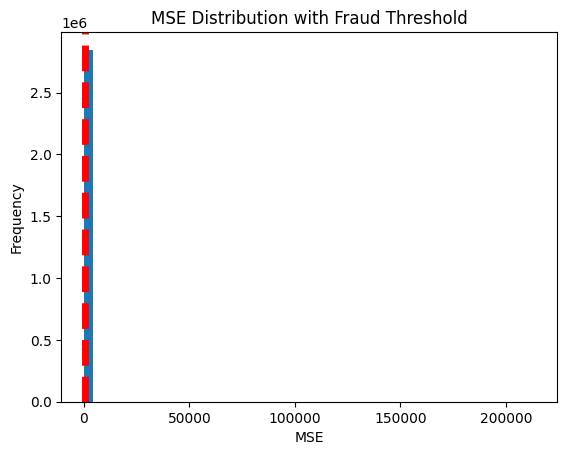

        tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  \
285563   2025-01-04 15:58:07   2025-01-04 15:58:55           0.32   
708849   2025-01-09 12:19:06   2025-01-09 13:14:26        4020.04   
1132222  2025-01-13 18:26:57   2025-01-13 18:27:21           0.00   
1306174  2025-01-15 14:31:32   2025-01-15 14:32:23           0.00   
1780915  2025-01-20 12:07:18   2025-01-20 12:12:42           1.60   

         fare_amount  passenger_count  tip_amount  total_amount  \
285563          0.01              1.0        40.0         63.33   
708849         82.80              1.0        15.0        101.05   
1132222         0.01              1.0        24.0         25.76   
1306174         0.01              1.0        20.0         21.76   
1780915    863372.12              1.0         0.0     863380.37   

         trip_duration  fare_per_mile    tip_percent            mse  \
285563        0.800000       0.031250  400000.000000    3927.499537   
708849       55.333333       0.020597   

In [ ]:
# ------------------- Step 7: Visualizations ----------------------

plt.hist(mse, bins=50)
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=5, label='Threshold')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.title("MSE Distribution with Fraud Threshold")
plt.show()

print(df[df['fraud_flag'] == True].head())

In [ ]:
# ------------------- Step 8: Save Cleaned + Fraud Labels ----------------------

# Save for further analysis or Power BI
output_path = '/content/cleaned_taxi_data_with_fraud.parquet'
df.to_parquet(output_path)
print("Cleaned & labeled data saved to:", output_path)

Cleaned & labeled data saved to: /content/cleaned_taxi_data_with_fraud.parquet
